In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import control
from numpy import sin, cos, tan, pi
from control import TransferFunction as TF

In [2]:
import txt_mixin

In [3]:
plt.rcParams['font.size'] = 14

In [4]:
import py_block_diagram

In [5]:
import importlib

In [6]:
importlib.reload(py_block_diagram)

<module 'py_block_diagram' from '/Users/kraussry/git/py_block_diagram/py_block_diagram/__init__.py'>

In [7]:
import py_block_diagram as pybd

### Helper Function

- draw the block diagram as needed to verify things

In [8]:
def mydraw(block_list,xlim=None,ylim=None):
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(111)
    mysys = pybd.block_diagram(block_list,ax)
    mysys.draw()
    if xlim is not None:
        plt.xlim(xlim)
    if ylim is not None:
        plt.ylim(ylim)
    mysys.axis_off()
    return mysys

## System Description

In [9]:
mysys = pybd.block_diagram()

In [10]:
U = pybd.pulse_input()

In [11]:
U.place_absolute(0,0)

In [12]:
mysys.append_block_to_dict("U",U)

In [13]:
line_sense = pybd.i2c_sensor(variable_name="line_sense")

In [14]:
encoder = pybd.i2c_sensor(variable_name="encoder")

In [15]:
mysys.append_sensor(line_sense)

In [16]:
mysys.append_sensor(encoder)

In [17]:
mysys.actuator_name_list

[]

In [18]:
mega_address = 0x07
uno_address = 0x08

In [19]:
G = pybd.cart_pendulum_upy(line_sense,encoder,send_address=mega_address, \
                           read_address1=mega_address, \
                           read_address2=uno_address, i2c=None)

In [20]:
mysys.append_block_to_dict("G",G)

In [21]:
mysys.sensor_name_list

['line_sense', 'encoder']

In [22]:
add1 = pybd.addition_block()

In [23]:
subtract1 = pybd.subtraction_block()

In [24]:
v_nom = pybd.int_constant_block(0,'v_nom_block')

In [25]:
v_nom.place_relative(U, "right", yshift=4, xshift=-4)

In [26]:
mysys.append_block_to_dict("v_nom",v_nom)

In [27]:
add1.place_relative(U, "right", yshift=1, xshift=3)

In [28]:
subtract1.place_relative(U, "right", yshift=-2)

In [29]:
mysys.append_block_to_dict("add1",add1)

In [30]:
mysys.append_block_to_dict("sub1",subtract1)

In [31]:
add1.set_inputs(v_nom, U)

In [32]:
subtract1.set_inputs(v_nom, U)

In [33]:
G.place_relative(U, "right", rel_distance=12)

In [34]:
G.label

'G'

In [35]:
def mydraw2():
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(111)
    mysys.ax = ax
    mysys.draw()

drawing: u_pulse_block
drawing: G
drawing: v_nom_block
drawing: add_block1
drawing: subtract_block1


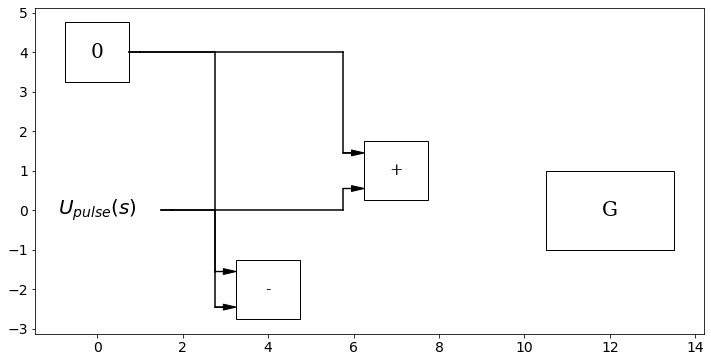

In [36]:
mydraw2()

In [37]:
G.set_inputs(add1,subtract1)

drawing: u_pulse_block
drawing: G
drawing: v_nom_block
drawing: add_block1
drawing: subtract_block1


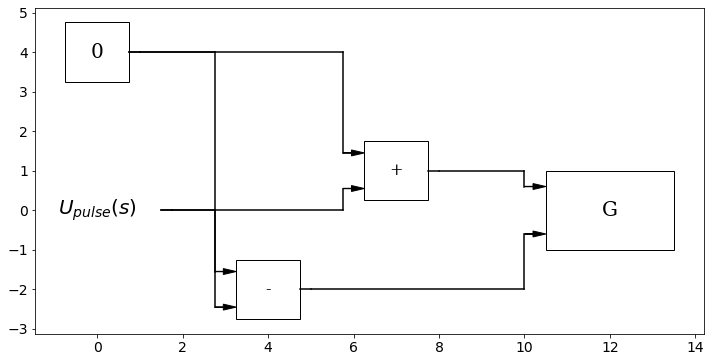

In [38]:
mydraw2()

In [39]:
Y = pybd.output_block("line position",G)

In [40]:
Y.place_relative(G, "right",8)

In [41]:
Y.width = 6

In [42]:
mysys.append_block_to_dict("Y",Y)

drawing: u_pulse_block
drawing: G
drawing: v_nom_block
drawing: add_block1
drawing: subtract_block1
drawing: None


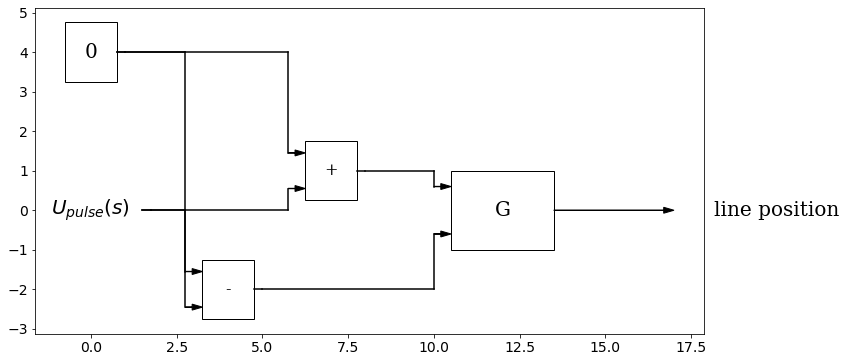

In [43]:
mydraw2()

## Print Blocks

In [44]:
mysys.print_blocks = [U,add1,subtract1,line_sense]

## Execution Order

In [45]:
mysys.find_execution_order([U,v_nom,add1,subtract1])

In [46]:
mysys.execution_order

## Codegen Test

In [47]:
ls *.py

main.py*                              main_template.py*
main_backup_hbridge_motor_control.py* upybd.py


In [48]:
folder = "cart_pend_OL"

In [49]:
import rwkos

In [50]:
rwkos.make_dir(folder)

In [51]:
mysys.generate_python_code("main.py", \
                           "main_template.py", \
                            output_folder=folder)

In [52]:
add1.input_block1_name

'v_nom_block'

In [53]:
add1.get_python_secondary_init_code()

['add_block1.set_input_block1(v_nom_block)',
 'add_block1.set_input_block2(u_pulse_block)',
 'add_block1.init_vectors(N)']

In [54]:
mysys.print_blocks

In [55]:
U.variable_name

'u_pulse_block'

In [56]:
test = """line1
    line2
    line3
line4"""

In [57]:
print(test)

line1
    line2
    line3
line4


In [58]:
test.split()

['line1', 'line2', 'line3', 'line4']